In [133]:
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers.experimental import preprocessing

In [2]:
df = pd.read_csv("./Dataset/bhp.csv")
print(df.shape)
df.head()

(13200, 7)


,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250


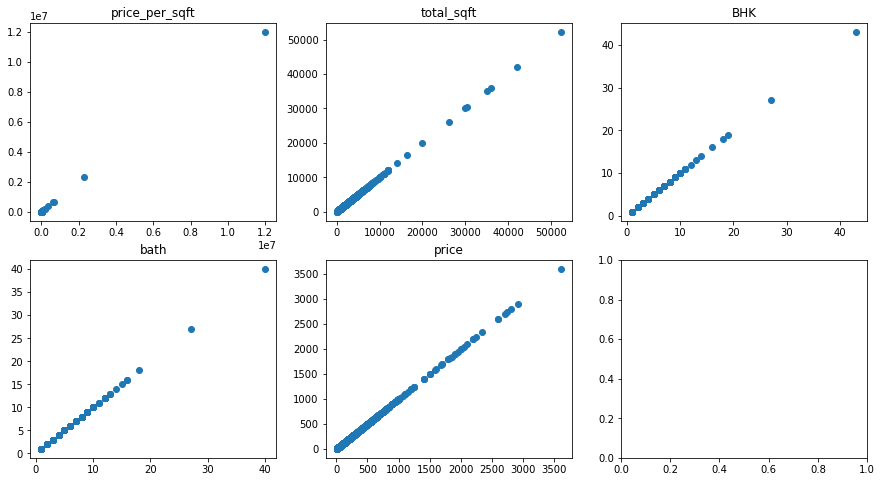

In [39]:
fig,a =  plt.subplots(2,3,figsize=(15,8))
a[0][0].set_title('price_per_sqft')
a[0][0].scatter(df.price_per_sqft, df.price_per_sqft)
a[0][1].set_title('total_sqft')
a[0][1].scatter(df.total_sqft, df.total_sqft)
a[0][2].set_title('BHK')
a[0][2].scatter(df.bhk, df.bhk)
a[1][0].set_title('bath')
a[1][0].scatter(df.bath, df.bath)
a[1][1].scatter(df.price, df.price)
a[1][1].set_title('price')
plt.show()

In [28]:
low_th, upr_th = df.price_per_sqft.quantile([0.001, 0.999])
df1 = df[(df.price_per_sqft<upr_th) & (df.price_per_sqft>low_th)]
#
low_th, upr_th = df1.price.quantile([0.001, 0.999])
df1 = df1[(df1.price<upr_th) & (df1.price>low_th)]
#
low_th, upr_th = df1.total_sqft.quantile([0.001, 0.999])
df1 = df1[(df1.total_sqft<upr_th) & (df1.total_sqft>low_th)]
#
low_th, upr_th = df1.bath.quantile([0.001, 0.999])
df1 = df1[(df1.bath<upr_th) & (df1.bath>low_th)]
#
low_th, upr_th = df1.bhk.quantile([0.001, 0.999])
df1 = df1[(df1.bhk<upr_th) & (df1.bhk>low_th)]

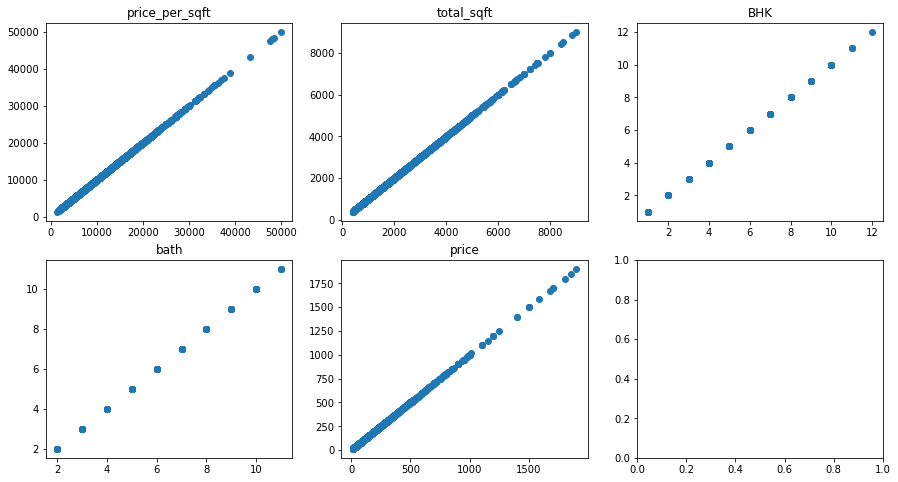

In [41]:
fig,a =  plt.subplots(2,3,figsize=(15,8))
a[0][0].set_title('price_per_sqft')
a[0][0].scatter(df1.price_per_sqft, df1.price_per_sqft)
a[0][1].set_title('total_sqft')
a[0][1].scatter(df1.total_sqft, df1.total_sqft)
a[0][2].set_title('BHK')
a[0][2].scatter(df1.bhk, df1.bhk)
a[1][0].set_title('bath')
a[1][0].scatter(df1.bath, df1.bath)
a[1][1].scatter(df1.price, df1.price)
a[1][1].set_title('price')
plt.show()

In [44]:
df2 = df1.drop('size', axis=1)
print(df2.shape)
df2.head()

(12348, 6)


,location,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,2600.0,5.0,120.00,4,4615
2,Uttarahalli,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,1521.0,3.0,95.00,3,6245
4,Kothanur,1200.0,2.0,51.00,2,4250


In [45]:
label_encoder = LabelEncoder()
df2['location'] = label_encoder.fit_transform(df2['location'])
df2.head()

,location,total_sqft,bath,price,bhk,price_per_sqft
0,79,1056.0,2.0,39.07,2,3699
1,60,2600.0,5.0,120.00,4,4615
2,225,1440.0,2.0,62.00,3,4305
3,159,1521.0,3.0,95.00,3,6245
4,151,1200.0,2.0,51.00,2,4250


In [201]:
X = df2[['total_sqft', 'bath','bhk', 'location']]
y = df2['price']
X_train, X_test, y_train, y_test = train_test_split(X, y)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((9261, 4), (3087, 4), (9261,), (3087,))

In [136]:
normalizer = preprocessing.Normalization(axis=-1)
normalizer.adapt(np.array(X_train))
print(normalizer.mean.numpy())

[1564.3324       2.770219     2.8736637  155.23193  ]


In [49]:
# scaler = MinMaxScaler().fit(X_train)
# x_tr_scaled = scaler.transform(X_train)
# x_ts_scaled = scaler.transform(X_test)
# x_tr_scaled

array([[0.04985192, 0.44444444, 0.7       , 1.        ],
       [0.07601185, 0.        , 0.1       , 1.        ],
       [0.04985192, 0.        , 0.2       , 0.4875    ],
       ...,
       [0.18928924, 0.        , 0.2       , 0.5       ],
       [0.12944225, 0.        , 0.2       , 0.0875    ],
       [0.04368213, 0.        , 0.1       , 0.58333333]])

In [170]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [188]:
model = keras.Sequential()

#Input Layer
model.add(keras.layers.Dense(X.shape[1], activation='relu', input_dim = X.shape[1]))

#Hidden Layer
model.add(keras.layers.Dense(32, activation='relu'))
model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dense(254, activation='relu'))
model.add(keras.layers.Dense(32, activation='relu'))
model.add(keras.layers.Dense(64, activation='relu'))

#Output Layer
model.add(keras.layers.Dense(1))

#compile model
model.compile(optimizer='adam', loss = 'mse', metrics=['accuracy','mse', 'mae'])

model.summary()

Model: "sequential_40"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_236 (Dense)            (None, 4)                 20        
_________________________________________________________________
dense_237 (Dense)            (None, 32)                160       
_________________________________________________________________
dense_238 (Dense)            (None, 64)                2112      
_________________________________________________________________
dense_239 (Dense)            (None, 128)               8320      
_________________________________________________________________
dense_240 (Dense)            (None, 254)               32766     
_________________________________________________________________
dense_241 (Dense)            (None, 32)                8160      
_________________________________________________________________
dense_242 (Dense)            (None, 64)              

In [184]:
model.fit(X_train, y_train, batch_size=200 ,epochs=100)

Epoch 1/100
47/47 [==============================] - 0s 3ms/step - loss: 6579.5986 - accuracy: 0.0000e+00 - mse: 6579.5981 - mae: 40.6461
Epoch 2/100
47/47 [==============================] - 0s 4ms/step - loss: 6465.4663 - accuracy: 0.0000e+00 - mse: 6465.4663 - mae: 41.1136
Epoch 3/100
47/47 [==============================] - 0s 3ms/step - loss: 6931.1299 - accuracy: 0.0000e+00 - mse: 6931.1299 - mae: 41.1509
Epoch 4/100
47/47 [==============================] - 0s 3ms/step - loss: 6425.2485 - accuracy: 0.0000e+00 - mse: 6425.2485 - mae: 39.8604
Epoch 5/100
47/47 [==============================] - 0s 4ms/step - loss: 6459.1548 - accuracy: 0.0000e+00 - mse: 6459.1548 - mae: 40.1160
Epoch 6/100
47/47 [==============================] - 0s 4ms/step - loss: 6499.6377 - accuracy: 0.0000e+00 - mse: 6499.6377 - mae: 40.6695
Epoch 7/100
47/47 [==============================] - 0s 4ms/step - loss: 6576.9595 - accuracy: 0.0000e+00 - mse: 6576.9595 - mae: 40.6031
Epoch 8/100
47/47 [===============

47/47 [==============================] - 0s 3ms/step - loss: 6478.1826 - accuracy: 0.0000e+00 - mse: 6478.1826 - mae: 40.0584
Epoch 61/100
47/47 [==============================] - 0s 3ms/step - loss: 6407.2373 - accuracy: 0.0000e+00 - mse: 6407.2373 - mae: 40.6230
Epoch 62/100
47/47 [==============================] - 0s 3ms/step - loss: 6415.6831 - accuracy: 0.0000e+00 - mse: 6415.6831 - mae: 39.8119
Epoch 63/100
47/47 [==============================] - 0s 3ms/step - loss: 6383.4106 - accuracy: 0.0000e+00 - mse: 6383.4106 - mae: 40.4647
Epoch 64/100
47/47 [==============================] - 0s 3ms/step - loss: 6413.6221 - accuracy: 0.0000e+00 - mse: 6413.6221 - mae: 40.0244
Epoch 65/100
47/47 [==============================] - 0s 4ms/step - loss: 6443.1265 - accuracy: 0.0000e+00 - mse: 6443.1265 - mae: 40.0782
Epoch 66/100
47/47 [==============================] - 0s 3ms/step - loss: 6444.4614 - accuracy: 0.0000e+00 - mse: 6444.4619 - mae: 40.4155
Epoch 67/100
47/47 [====================

In [185]:
score_mse_test = classifier.evaluate(X_test, y_test)
print('Test Score:', score_mse_test)

97/97 [==============================] - 0s 973us/step - loss: 28346.3924
Test Score: 28199.443359375


<Figure size 720x432 with 0 Axes>

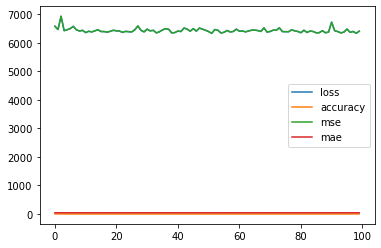

In [186]:
plt.figure(figsize=(10,6))
pd.DataFrame(model.history.history).plot()
plt.show()

In [187]:
y_pred = model.predict(x_ts_scaled).reshape(x_ts_scaled.shape[0],)
pred_df = pd.DataFrame({'Actual value':y_test, 'Predicted value':y_pred})

print(pred_df.head())

from sklearn.metrics import mean_absolute_error

MAE_val = mean_absolute_error(y_true=pred_df['Actual value'], y_pred=pred_df['Predicted value'])
print("\nfrom the MAE result, on average the model about {:.2f} off from true price point in mean of actual values.".format(MAE_val))

       Actual value  Predicted value
11704         101.0       129.737427
6418          135.0       140.598633
6522          120.0       138.593735
4221           52.7       125.459557
11948          53.0       126.708565

from the MAE result, on average the model about 76.89 off from true price point in mean of actual values.


In [180]:
'''
This score metric is for explain variance regression score function.
Best possible score is 1.0, lower values are worse.
'''
from sklearn.metrics import explained_variance_score

explained_variance_score(y_test, y_pred)

0.12320134649131476

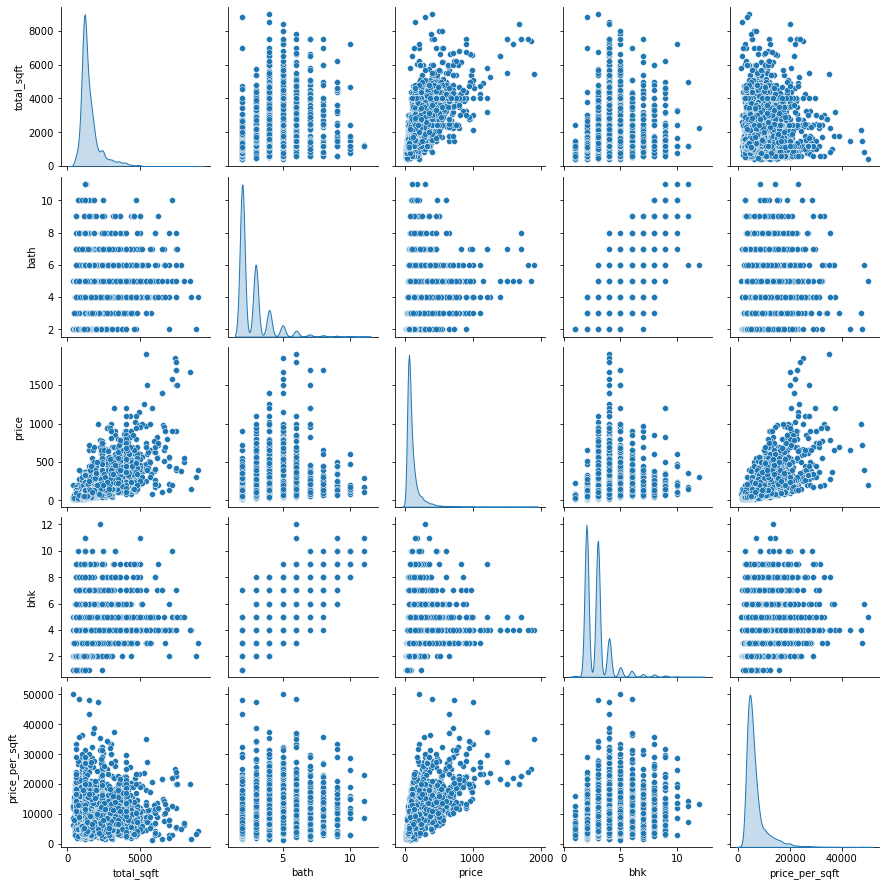

In [181]:
sns.pairplot(df1, diag_kind='kde')

In [206]:
def X():
    return X_train.repeat().shuffle(buffer).batch(batch_size).make_one_shot_iterator().get_next()
def Y():
    return X_test.shuffle(buffer).batch(batch_size).make_one_shot_iterator().get_next()

In [190]:
feature_columns = []
cols = X.columns
for col in cols[1:-1]:
    feature_columns.append(tf.feature_column.numeric_column(col))

In [193]:
sess = tf.compat.v1.Session()

In [194]:
model = tf.estimator.DNNRegressor(feature_columns=feature_columns, hidden_units=[10,10])

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\ASUS\\AppData\\Local\\Temp\\tmpu6b6s8b9', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_checkpoint_save_graph_def': True, '_service': None, '_cluster_spec': ClusterSpec({}), '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [207]:
model.train(input_fn= Xi,steps=500)

AttributeError: 'DataFrame' object has no attribute 'shuffle'